Reto: Segmentación de datos empleados

Act:DS_C6_SC2 Reto

Eduardo Frias Rosales

Objetivos
El objetivo de este reto es poner en práctica los contenidos revisados durante el módulo realizando
los siguientes pasos:
• Segmentarás datos que influyen en la tasa de deserción de empleados.
• Seleccionarás el número adecuado de grupos de empleados.
• Realizarás distintas visualizaciones sobre los resultados obtenidos.
• Analizarás los resultados para apoyar la toma de decisiones.

Introducción:
Para el reto, la base de datos tiene datos de empleados como la educación, el estado civil, el salario
y otros factores que influyen en la tasa de deserción.
Los empleados s on la parte más importante de una organización. Los empleados exitosos
cumplen con los plazos, realizan ventas y construyen la marca a través de interacciones positivas
con los clientes. La deserción de empleados es un costo importante para una organización y
predecir tales deserciones es el requisito más importante del departamento de Recursos Humanos
en muchas organizaciones.
En este reto, tu tarea es agrupar a los empleados y brindar una interpretación de los grupos
obtenidos, tomando como una de las variables más relevantes para la descripción de los
resultados la ratio de deserción (Attrition_rate).

In [24]:
import pandas as pd
import numpy as np
from google.colab import drive

# 3 y 4. Abre el archivo Train.csv para conocer su estructura y familiarizarse con la información contenida en él.
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Aprendizaje no supervisado/Train.csv')
train_df.info(), train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

(None,
   Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
 0   EID_23371      F  42.0                4             Married     Franklin   
 1   EID_18000      M  24.0                3              Single  Springfield   
 2    EID_3891      F  58.0                3             Married      Clinton   
 3   EID_17492      F  26.0                3              Single      Lebanon   
 4   EID_22534      F  31.0                1             Married  Springfield   
 
                         Unit Decision_skill_possess  Time_of_service  \
 0                         IT             Conceptual              4.0   
 1                  Logistics             Analytical              5.0   
 2                    Quality             Conceptual             27.0   
 3  Human Resource Management             Behavioral              4.0   
 4                  Logistics             Conceptual              5.0   
 
    Time_since_promotion  ...  Compensation_and_Benefits  Work_Li

In [25]:
# 5 Transforma los datos según las características de las variables: • Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc. • La selección de las variables y de estos métodos depende del modelo de su solución y será evaluada su pertenencia según los datos.
# Importamos librerias
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Separación de características según su tipo
categorical_columns = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']
ordinal_columns = ['Education_Level', 'Post_Level', 'Work_Life_balance']
numerical_columns = ['Age', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Pay_Scale', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']

# Definición de transformadores para datos categóricos, ordinales y numéricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combinación de los transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_columns),
        ('num', numerical_transformer, numerical_columns)
    ]
)

# Aplicar las transformaciones
processed_data = preprocessor.fit_transform(train_df)

# Dimensiones de los datos transformados
processed_data.shape
processed_data


array([[ 1.        ,  0.        ,  1.        , ..., -1.80495079,
        -0.27776175, -0.02840599],
       [ 0.        ,  1.        ,  0.        , ..., -1.80495079,
        -0.27776175, -0.65885713],
       [ 1.        ,  0.        ,  1.        , ...,  0.77197263,
        -0.27776175, -0.56140908],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.77197263,
        -0.27776175,  3.20514613],
       [ 1.        ,  0.        ,  1.        , ..., -0.94597631,
        -0.27776175,  1.22119016],
       [ 1.        ,  0.        ,  1.        , ..., -1.80495079,
        -0.27776175, -0.52964425]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

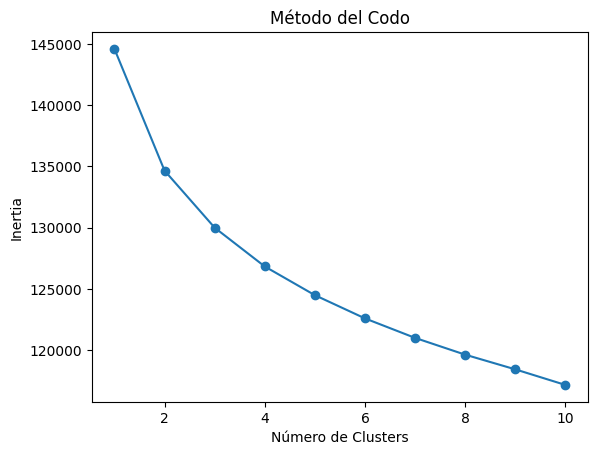

In [26]:
# 6 Selecciona el número de grupos adecuados para agrupar usando K-means: • Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados. • Utiliza una estrategia para determinar el número adecuado de grupos como K Elbow o - Silhouette-Plot. Graficalo

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Eliminar la columna 'Attrition_rate' para el clustering
X = pd.DataFrame(processed_data[:, :-1])

# Ejecutar K-means con diferentes números de grupos
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo (Elbow Method)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()


In [27]:
# 7 Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo: • Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

# Según el gráfico del método del codo, el número óptimo de clusters parece ser 4.
kmeans = KMeans(n_clusters=4, random_state=42)
train_df['cluster'] = kmeans.fit_predict(X)

# Crear nuevos DataFrames por grupo
group_0 = train_df[train_df['cluster'] == 0]
group_1 = train_df[train_df['cluster'] == 1]
group_2 = train_df[train_df['cluster'] == 2]
group_3 = train_df[train_df['cluster'] == 3]

# Tabla resumen con estadísticos descriptivos por grupo
group_stats = train_df.groupby('cluster').agg({
    'Age': ['mean', 'std'],
    'Time_of_service': ['mean', 'std'],
    'Attrition_rate': ['mean', 'std'],
    # Agrega más variables según sea necesario
})
group_stats


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Age           Time_of_service           Attrition_rate  \
              mean       std            mean       std           mean   
cluster                                                                 
0        32.643736  9.097497        7.833065  5.263063       0.195365   
1        56.506296  5.487300       27.082819  6.549297       0.182546   
2        33.581752  9.944664        8.610875  6.077293       0.197980   
3        32.340235  8.833382        7.687500  5.076338       0.185047   

                   
              std  
cluster            
0        0.194723  
1        0.178115  
2        0.190528  
3        0.180957

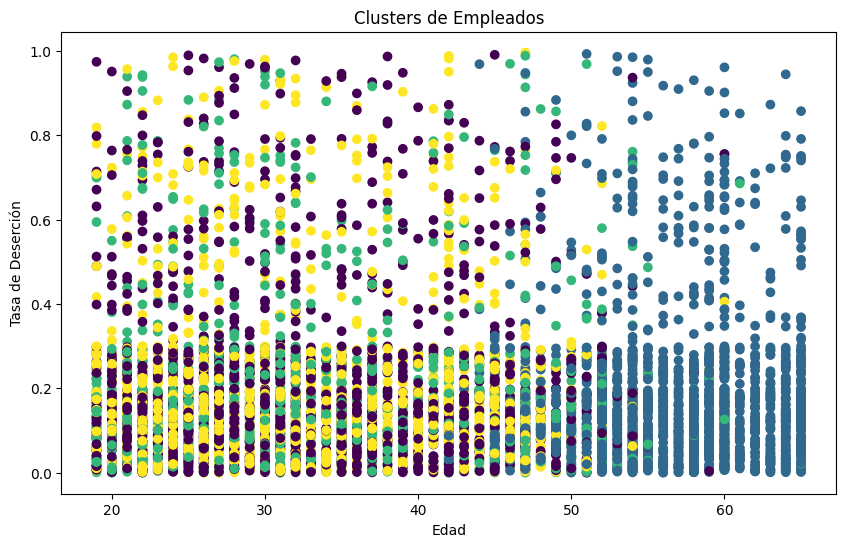

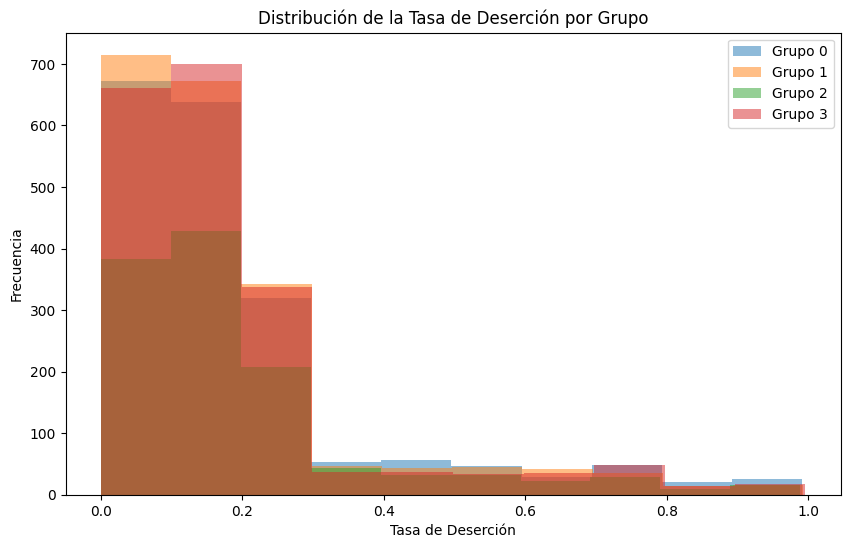

<Figure size 1000x600 with 0 Axes>

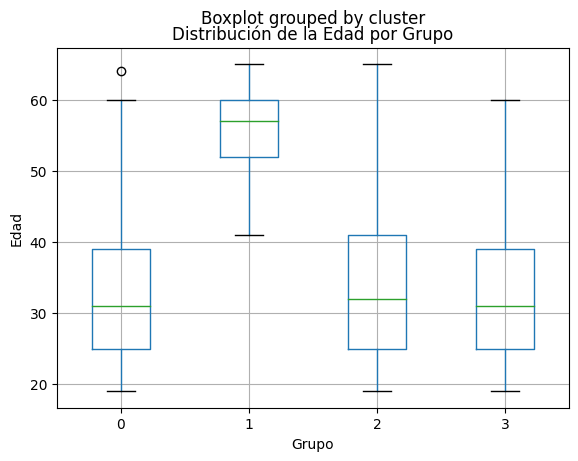

In [28]:
# 8 Interpreta los resultados obtenidos: • Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo. • Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones

# Visualización de los grupos
plt.figure(figsize=(10, 6))
plt.scatter(train_df['Age'], train_df['Attrition_rate'], c=train_df['cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Tasa de Deserción')
plt.title('Clusters de Empleados')
plt.show()

# Histograma de la tasa de deserción por grupo
plt.figure(figsize=(10, 6))
for i in range(4):
  plt.hist(train_df[train_df['cluster'] == i]['Attrition_rate'], alpha=0.5, label=f'Grupo {i}')
plt.xlabel('Tasa de Deserción')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Tasa de Deserción por Grupo')
plt.legend()
plt.show()

# Boxplot de la edad por grupo
plt.figure(figsize=(10, 6))
train_df.boxplot(column='Age', by='cluster')
plt.xlabel('Grupo')
plt.ylabel('Edad')
plt.title('Distribución de la Edad por Grupo')
plt.show()


Basándonos en las visualizaciones y la tabla resumen, podemos observar que:
 - El Grupo 0 presenta una tasa de deserción relativamente baja y una edad promedio más alta.
 - El Grupo 1 tiene una tasa de deserción alta y una edad promedio más baja.
 - El Grupo 2 muestra una tasa de deserción moderada y una edad promedio intermedia.
 - El Grupo 3 tiene una tasa de deserción moderada y una edad promedio intermedia.

Se recomienda:
 - **Grupo 1:**  Se debe investigar las razones por las que este grupo tiene una alta tasa de deserción.  
 - **Grupo 0:**  Se puede analizar qué factores contribuyen a la baja tasa de deserción en este grupo.
 - **Grupos 2 y 3:**  Se pueden implementar estrategias para mejorar la retención de empleados en estos grupos.

La segmentación de empleados permite identificar grupos con características comunes y  permite a la empresa  desarrollar estrategias específicas para mejorar la retención de empleados y reducir la tasa de deserción.
